# Imports

In [ ]:
# $ sudo CVXOPT_BUILD_GLPK=1 pip install cvxopt
!CVXOPT_BUILD_GLPK=1 pip install cvxopt
!pip install quadprog
import cvxopt
import quadprog

import numpy as np
from numpy import array, dot

     |████████████████████████████████| 276kB 3.6MB/s 
  Created wheel for quadprog: filename=quadprog-0.1.8-cp37-cp37m-linux_x86_64.whl size=336639 sha256=efedf7c8f9d3e4c914446aebb23a4bbc12daad9cf6ebc786f255b9614db48c0f
  Stored in directory: /root/.cache/pip/wheels/0c/39/5f/c712b0e462439dec9b30080cf34622f167929b39bd964d8baf
Successfully built quadprog


## CVXOPT

In [ ]:
def cvxopt_solve_qp(P, q, G=None, h=None, A=None, b=None):
    P = .5 * (P + P.T)  # make sure P is symmetric
    args = [cvxopt.matrix(P), cvxopt.matrix(q)]
    if G is not None:
        args.extend([cvxopt.matrix(G), cvxopt.matrix(h)])
        if A is not None:
            args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return np.array(sol['x']).reshape((P.shape[1],))

In [ ]:
M = array([[1., 2., 0.], [-8., 3., 2.], [0., 1., 1.]])
P = dot(M.T, M)
q = -dot(M.T, array([3., 2., 3.]))
G = array([[1., 2., 1.], [2., 0., 1.], [-1., 2., -1.]])
h = array([3., 2., -2.]).reshape((3,))

In [ ]:
cvxopt_solve_qp(P, q, G, h)

     pcost       dcost       gap    pres   dres
 0: -1.0062e+01 -8.2131e+00  3e+00  8e-01  6e-17
 1: -8.9877e+00 -7.1656e+00  6e-01  3e-01  2e-16
 2: -4.7428e+00 -5.6786e+00  9e-01  1e-16  2e-15
 3: -5.5832e+00 -5.5940e+00  1e-02  1e-16  2e-16
 4: -5.5921e+00 -5.5922e+00  1e-04  0e+00  9e-17
 5: -5.5922e+00 -5.5922e+00  1e-06  1e-16  2e-16
Optimal solution found.


array([ 0.12997344, -0.06498685,  1.74005307])

## QUADPROG

In [ ]:
def quadprog_solve_qp(P, q, G=None, h=None, A=None, b=None):
    qp_G = .5 * (P + P.T)   # make sure P is symmetric
    qp_a = -q
    if A is not None:
        qp_C = -numpy.vstack([A, G]).T
        qp_b = -numpy.hstack([b, h])
        meq = A.shape[0]
    else:  # no equality constraint
        qp_C = -G.T
        qp_b = -h
        meq = 0
    return quadprog.solve_qp(qp_G, qp_a, qp_C, qp_b, meq)[0]

In [ ]:
M = array([[1., 2., 0.], [-8., 3., 2.], [0., 1., 1.]])
P = dot(M.T, M)
q = -dot(M.T, array([3., 2., 3.]))
G = array([[1., 2., 1.], [2., 0., 1.], [-1., 2., -1.]])
h = array([3., 2., -2.]).reshape((3,))

In [ ]:
quadprog_solve_qp(P, q, G, h)

array([ 0.12997347, -0.06498674,  1.74005305])

# For LP the following function may be used

`scipy.optimize.linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='simplex', callback=None, options={'maxiter': 5000, 'disp': False, 'presolve': True, 'tol': 1e-12, 'autoscale': False, 'rr': True, 'bland': False}, x0=None)`






In [ ]:
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
c = [-1, 4]
A = [[-3, 1], [1, 2]]
b = [6, 4]
x0_bounds = (None, None)
x1_bounds = (-3, None)

res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])
res

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


     con: array([], dtype=float64)
     fun: -21.999999840824927
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([3.89999997e+01, 8.46872599e-08])
  status: 0
 success: True
       x: array([ 9.99999989, -2.99999999])

     con: array([], dtype=float64)
     fun: -5.4
 message: 'The solution was determined in presolve as there are no non-trivial constraints.'
     nit: 0
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 5. , -0.1])
 Vector z: [-1  4]


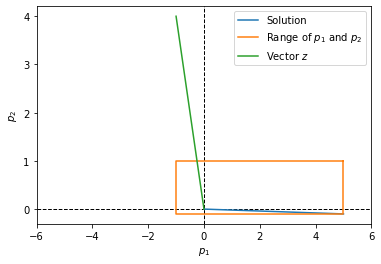

In [ ]:
p1_min = -1
p1_max =  5

p2_min = -0.1
p2_max =  1

p1_rng = np.array([p1_max, p1_max, p1_min, p1_min, p1_max])
p2_rng = np.array([p2_max, p2_min, p2_min, p2_max, p2_max])
z = np.array([-1, 4])

res = linprog(z, 
              bounds=[ (p1_min,p1_max), (p2_min,p2_max) ],
              method='revised simplex')

print(res)
print(f" Vector z: {z}")

plt.axes(xlabel='$p_1$', ylabel='$p_2$', xlim=(-6,6))
plt.axhline(c='k', linestyle='--', linewidth=1)
plt.axvline(c='k', linestyle='--', linewidth=1)

plt.plot(np.array([0, res.x[0]]), np.array([0, res.x[1]]), label='Solution' )
plt.plot(p1_rng, p2_rng, label='Range of $p_1$ and $p_2$')
plt.plot(np.array([0, z[0]]), np.array([0, z[1]]), label='Vector $z$' )
plt.legend()
plt.show()